In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# ------------------------------------------------------------------
# 1. Load data
# ------------------------------------------------------------------
df = pd.read_csv("nonlinear_svm_data.csv")  # x, y, label
X = df[["x", "y"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df["label"].values
y = 2 * y - 1  # Transforms 0->-1 and 1->+1

n_obs = X.shape[0]
print(f"Number of observations: {n_obs}")


Number of observations: 20


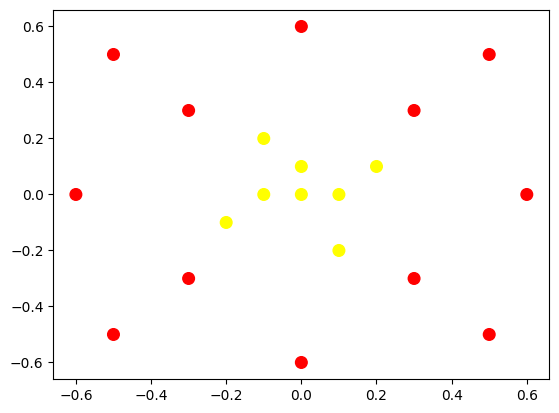

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap="autumn");

In [ ]:
# ------------------------------------------------------------------
# 2. Linear–kernel SVM
# ------------------------------------------------------------------
print("Linear kernel SVM")
linear_results = []
C_values = [1, 100, 1000]
# C_values = [1]
for C in C_values:
    lin_clf = SVC(kernel="linear", C=C)
    lin_clf.fit(X, y)

    y_hat = lin_clf.predict(X)
    zero_one_loss_value = n_obs * zero_one_loss(y, y_hat)  # ≡ 1 – accuracy

    linear_results.append(
        {
            "C": C,
            "Training Loss": zero_one_loss_value,
        }
    )

    print(f"   C = {C:<4}  -> training zero one loss = {zero_one_loss_value:0.3f}")

print("\nLinear SVM Results Summary:")
linear_df = pd.DataFrame(linear_results)
print(linear_df)

# print(linear_df.to_latex(index=False))


Linear kernel SVM
   C = 1     -> training zero one loss = 8.000
   C = 100   -> training zero one loss = 8.000
   C = 1000  -> training zero one loss = 8.000

Linear SVM Results Summary:
      C  Training Loss
0     1            8.0
1   100            8.0
2  1000            8.0
\begin{tabular}{rr}
\toprule
C & Training Loss \\
\midrule
1 & 8.000000 \\
100 & 8.000000 \\
1000 & 8.000000 \\
\bottomrule
\end{tabular}



In [63]:
# ------------------------------------------------------------------
# 3. Gaussian / RBF–kernel SVM
# ------------------------------------------------------------------
print("\nGaussian (RBF) kernel SVM   [γ = 1/(2a²),   C = 1]")
a_values = [0.1, 1, 10]
a_values = [0.1]
for a in a_values:
    gamma = 1.0 / (2.0 * a**2)  # scikit-learn parameter
    rbf_clf = SVC(kernel="rbf", C=1, gamma=gamma)
    rbf_clf.fit(X, y)

    y_hat = rbf_clf.predict(X)
    zero_one_loss_value = n_obs * zero_one_loss(y, y_hat)

    print(
        f"   a = {a:<4} (γ = {gamma:0.4f}) -> training zero one loss = {zero_one_loss_value:0.3f}"
    )



Gaussian (RBF) kernel SVM   [γ = 1/(2a²),   C = 1]
   a = 0.1  (γ = 50.0000) -> training zero one loss = 0.000


In [64]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = [-1, 1]  # ax.get_xlim()
    ylim = [-1, 1]  # ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    # ax.contour(
    #     X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    # )
    ax.contour(X, Y, P, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

    # plot support vectors
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300,
            linewidth=1,
            facecolors="none",
        )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

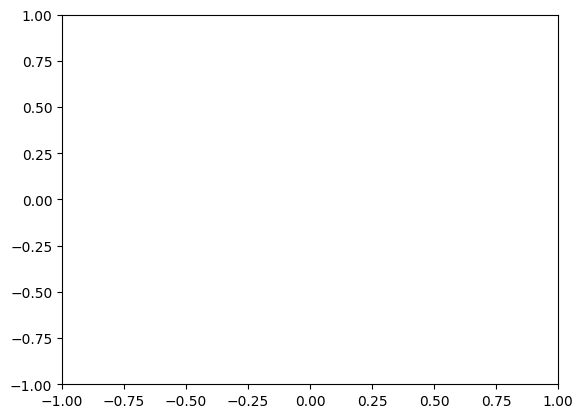

In [65]:
plot_svc_decision_function(lin_clf)

In [73]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    x_min, x_max, y_min, y_max = -1, 1, -1, 1
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

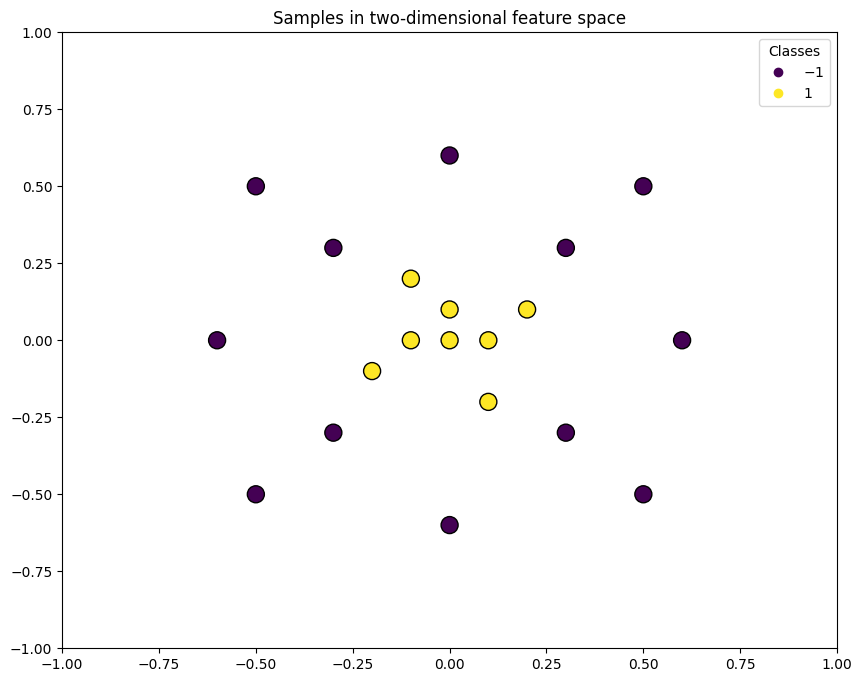

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
x_min, x_max, y_min, y_max = -1, 1, -1, 1
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

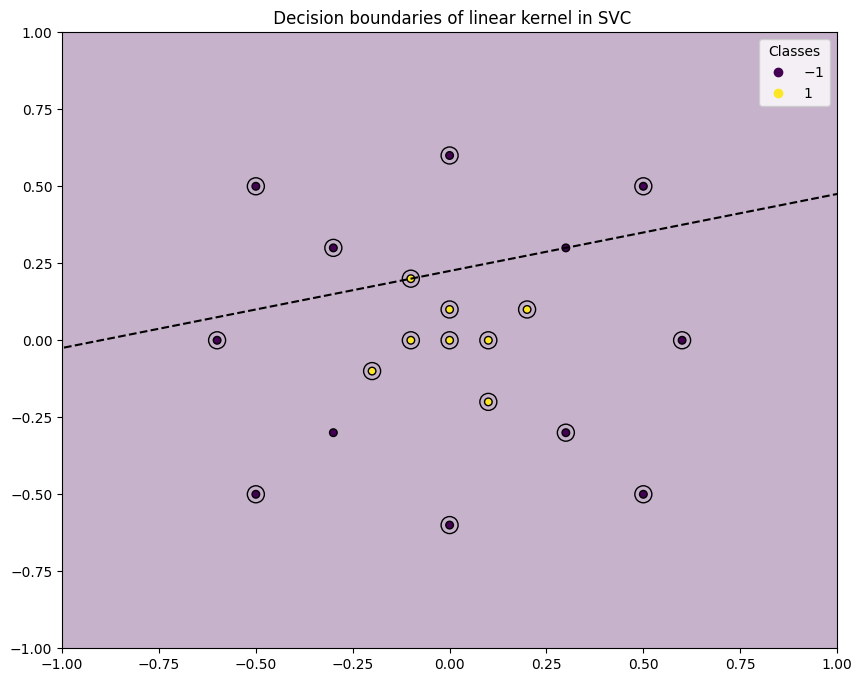

In [74]:
plot_training_data_with_decision_boundary("linear")


In [72]:
plt.show()